In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import missingno as msno
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.stats import norm, skew 
from scipy import stats
from datetime import date
import matplotlib
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("df_final.csv")
df['date']=pd.to_datetime(df['date'])
df1=df.set_index('date',drop=True)
#df1=df1.dropna()

In [22]:
df1.tail()

,state,elderly_mode,school_mode,masking_mode,unweighted_ili,flu_av7,flu_per_cap_av7,mask_av7,rr_av7,gp_av7,park_av7,transit_av7,work_av7,resid_av7,school_av7,elderly_av7,mask_policy_av7
date,,,,,,,,,,,,,,,,,
2022-12-25,VA,1.0,0.0,1.0,5.29949,37.28571,0.436830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0
2022-12-25,WA,2.0,1.0,2.0,4.75230,52.85714,0.694129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-25,WV,NaN,NaN,NaN,2.83938,33.00000,1.846519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-25,WI,2.0,0.0,1.0,2.83194,59.28571,1.018229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-25,WY,1.0,0.0,0.0,3.70607,8.00000,1.382268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0


In [42]:
a=df1.copy()
a_st=a[a['state']=='TX'][['unweighted_ili','elderly_mode']]['2020-01-05':'2022-12-25']
a_st['lag']=a_st['elderly_mode'].shift(1)
s1=a_st

In [43]:
s1['unweighted_ili'].corr(s1['lag'])

-0.7880946732858263

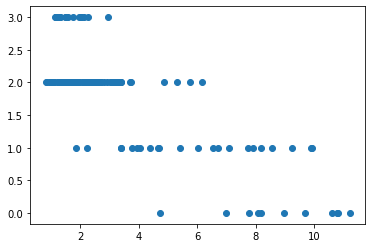

In [44]:
plt.scatter(s1['unweighted_ili'],s1['lag'])

In [50]:
s={'a':1,'b':-2}
sorted(s.items(),key=lambda x:abs(x[1]),reverse=True)[0][0]

'b'

{'AK': 1,
 'AZ': 1,
 'AR': 1,
 'CA': 1,
 'CO': 1,
 'CT': 1,
 'DE': 1,
 'FL': 1,
 'GA': 1,
 'HI': 1,
 'ID': 1,
 'IL': 1,
 'IN': 1,
 'IA': 1,
 'KS': 1,
 'KY': 1,
 'LA': 1,
 'ME': 1,
 'MD': 1,
 'MA': 1,
 'MI': 1,
 'MN': 1,
 'MS': 1,
 'MO': 1,
 'MT': 1,
 'NE': 1,
 'NV': 1,
 'NH': 1,
 'NJ': 1,
 'NM': 1,
 'NY': 1,
 'NC': 1,
 'ND': 1,
 'OH': 1,
 'OK': 1,
 'OR': 1,
 'PA': 1,
 'RI': 1,
 'SC': 1,
 'SD': 1,
 'TN': 1,
 'TX': 1,
 'UT': 1,
 'VT': 1,
 'VA': 1,
 'WA': 1,
 'WV': 1,
 'WI': 1,
 'WY': 1}

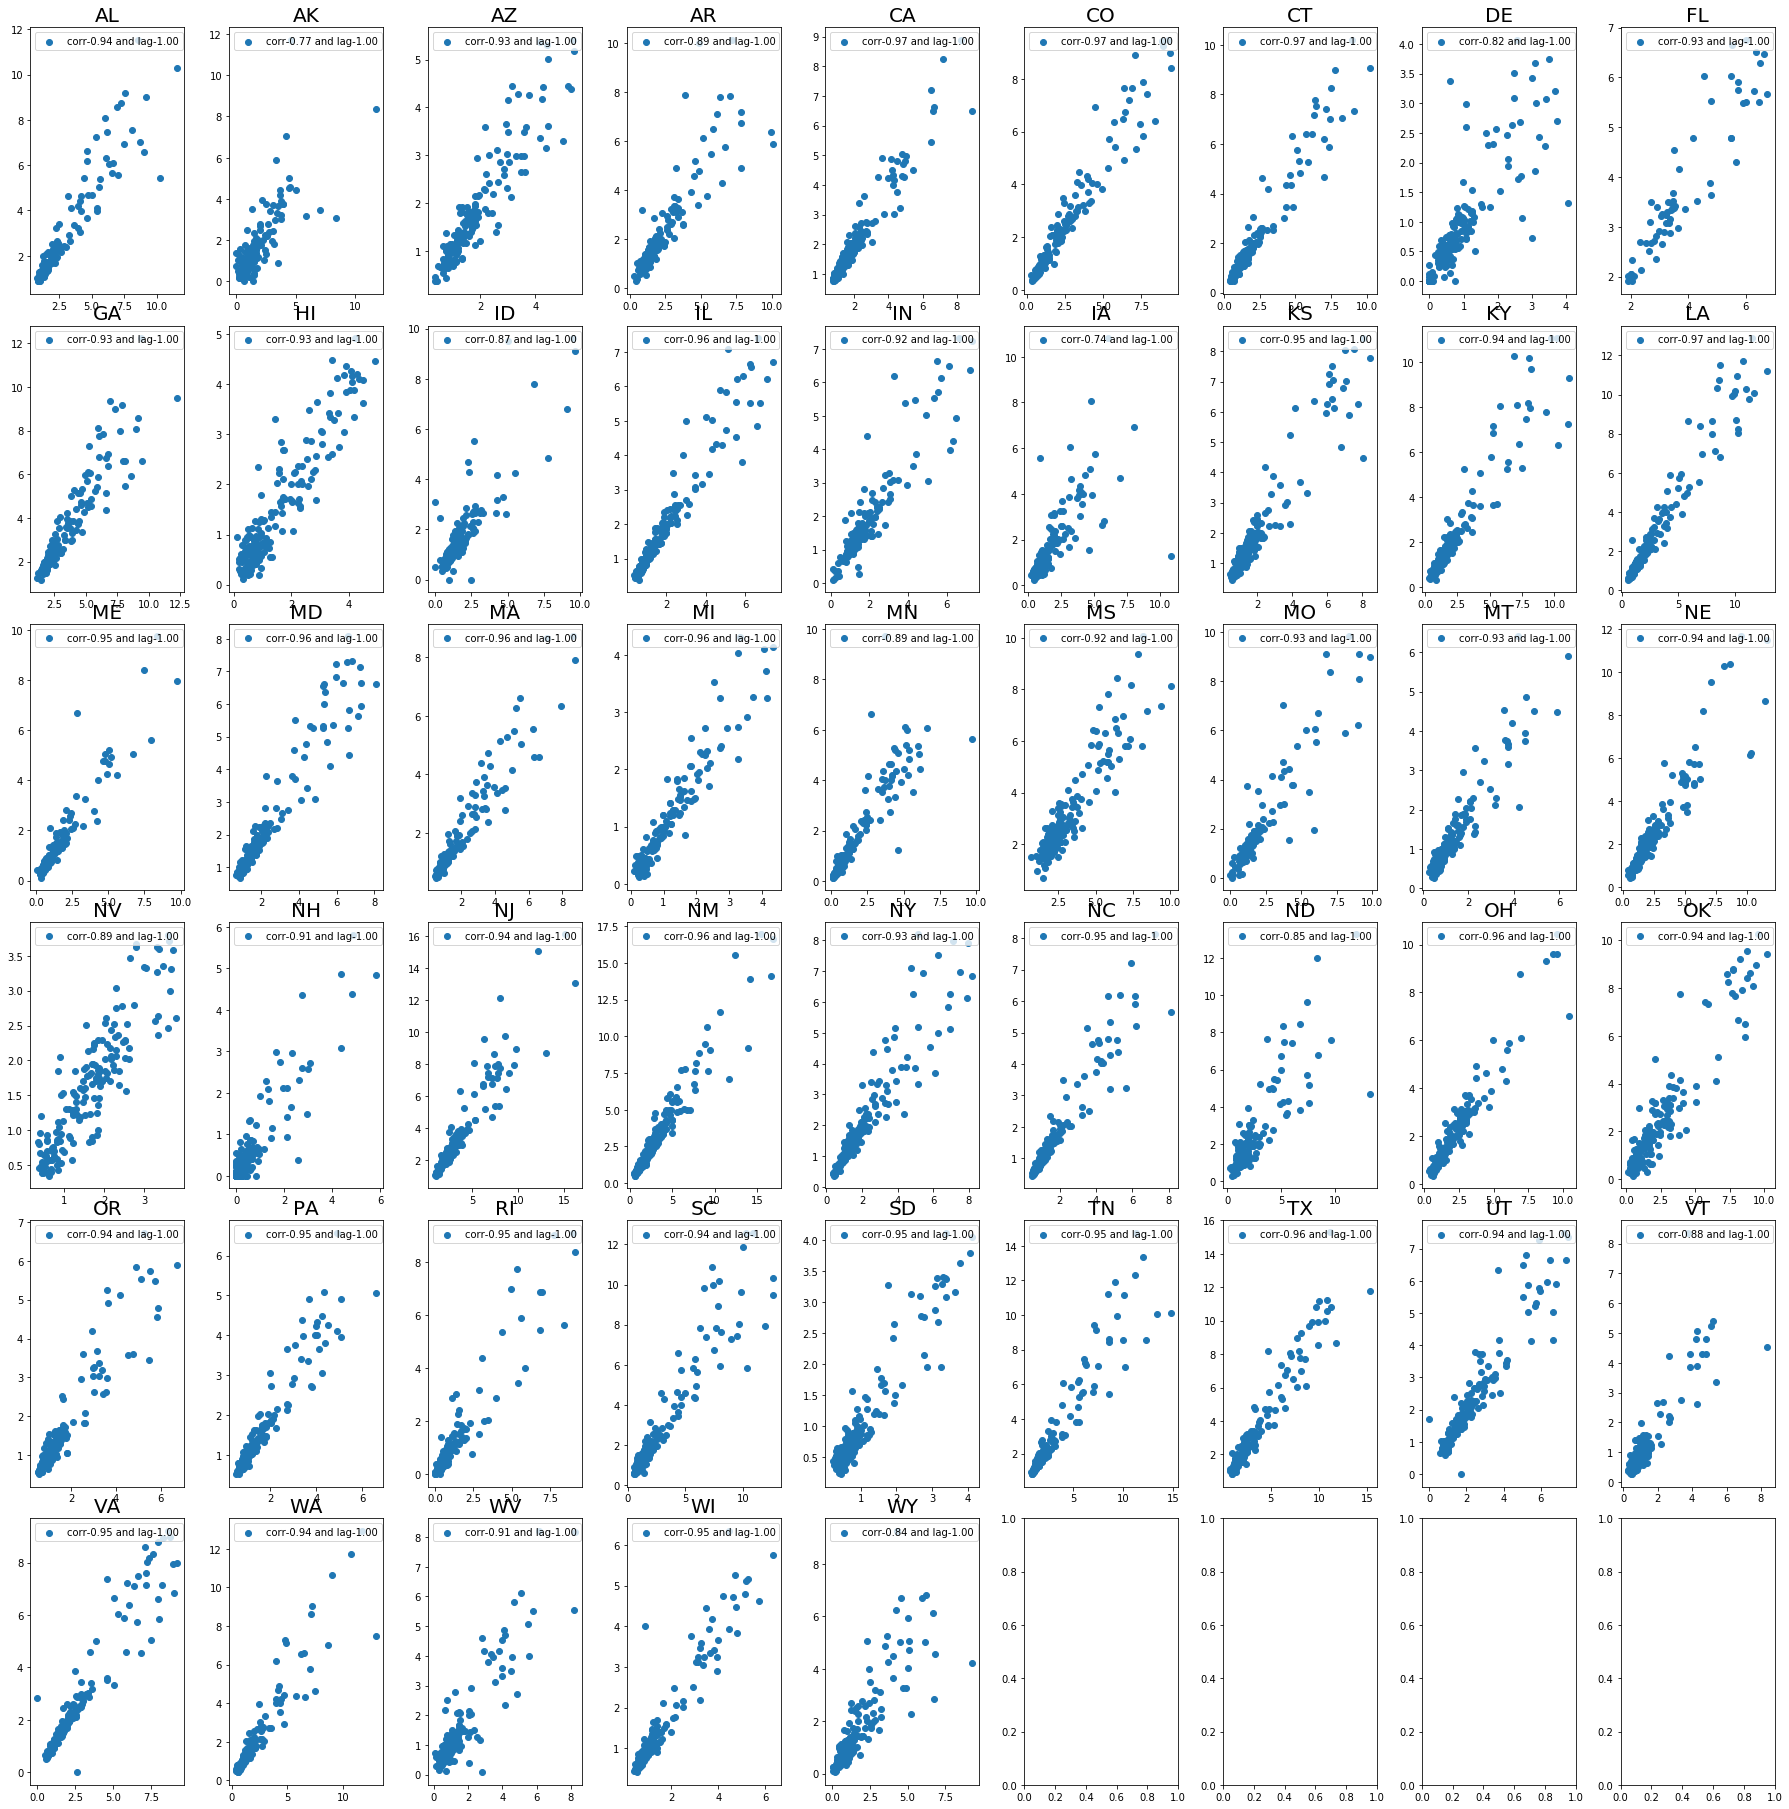

In [56]:
def correlation_lags_all_states(column,start_date,end_date,max_lag,type1):
#column,start_date,end_date='unweighted_ili','2019-09-29','2022-12-25'

    nrow=6
    ncol=9
    fig, axes = plt.subplots(nrow,ncol,figsize=(25,25))
    fig.tight_layout()
    i=0
    best_lag={}
    for r in range(nrow):
        for c in range(ncol):
            c1=df1[df1['state']==df1['state'].unique()[i]]['unweighted_ili'][start_date:end_date]
            cr={}
            for p in range(1,max_lag):
                c2=df1[df1['state']==df1['state'].unique()[i]][column][start_date:end_date].shift(p)
                corr=round(c1.corr(c2),2)
                cr[p]=corr
            if type1=='cat':
                sorted_toplag_index=sorted(cr.items(),key=lambda x:abs(x[1]),reverse=True)[0][0]
            else:
                sorted_toplag_index=sorted(cr.items(),key=lambda x:x[1],reverse=True)[0][0]
            top_lag_c2=df1[df1['state']==df1['state'].unique()[i]][column][start_date:end_date].shift(sorted_toplag_index)

            axes[r,c].scatter(c1,top_lag_c2,label=df1['state'].unique()[i])
            axes[r,c].set_title(df1['state'].unique()[i],fontsize=20)
            axes[r,c].legend(['corr-{:.2f} and lag-{:.2f}'.format(round(c1.corr(top_lag_c2),2),sorted_toplag_index)],
                loc = 'upper left',fontsize=10)

            if i==len(df1['state'].unique())-1:
                break
            i+=1
            best_lag[df1['state'].unique()[i]]=sorted_toplag_index
    return best_lag
lag_dict=correlation_lags_all_states('unweighted_ili','2019-09-29','2022-12-25',5,'cont')
lag_dict

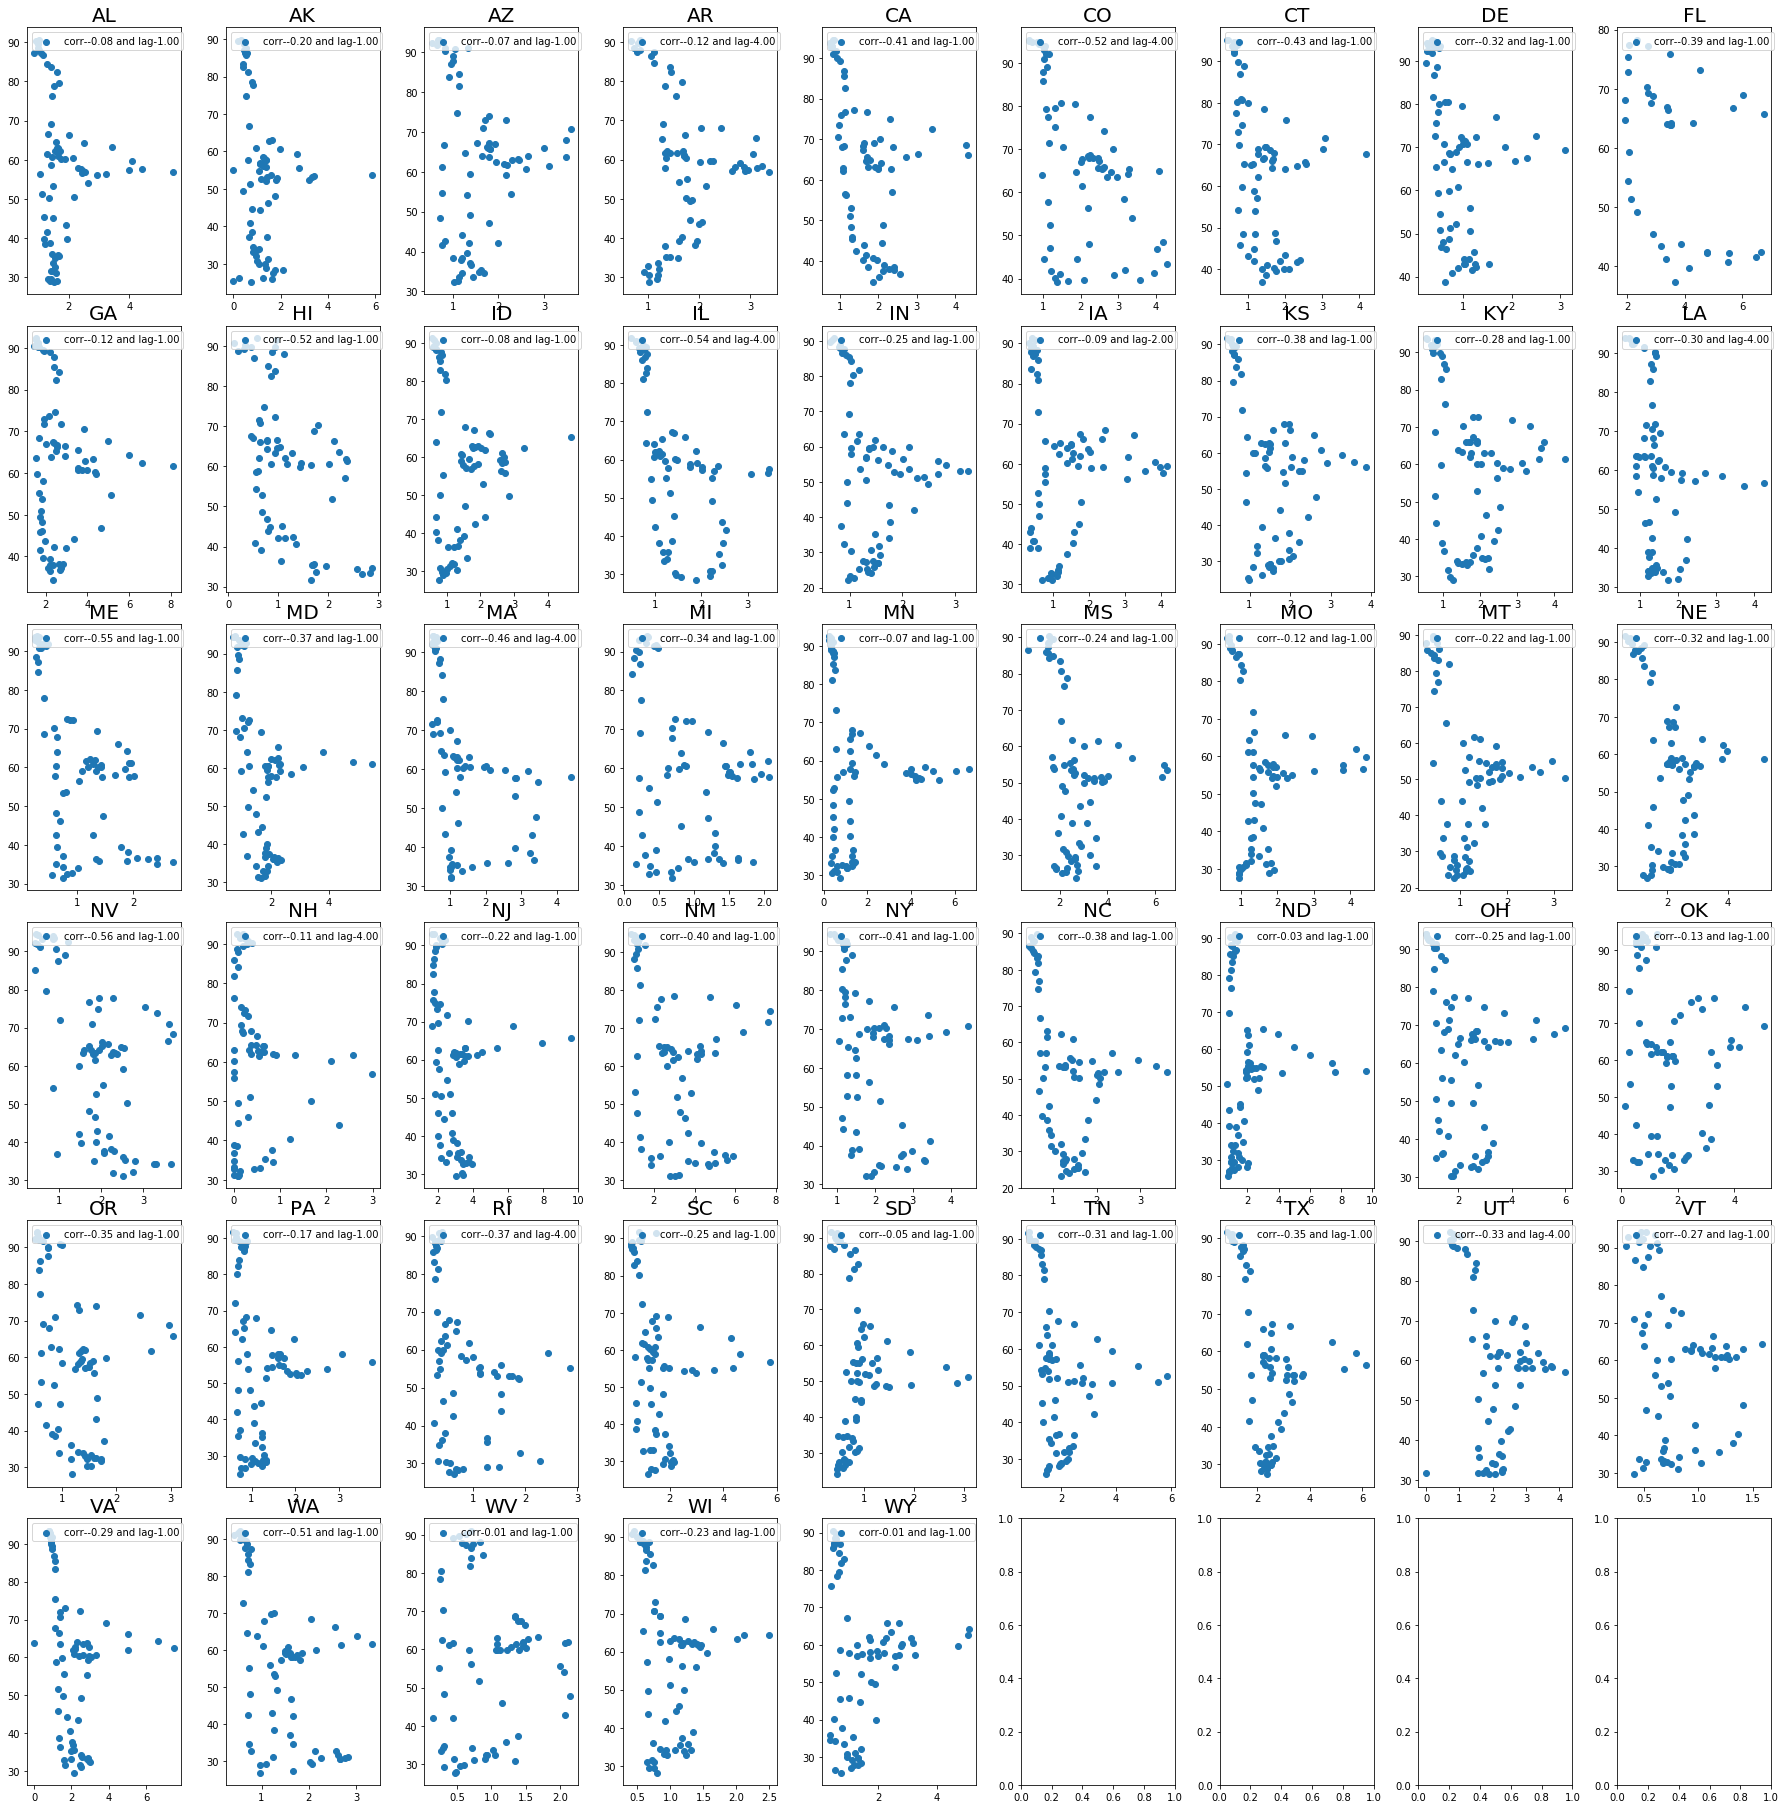

In [59]:
lag_dict=correlation_lags_all_states('mask_av7','2021-02-14','2022-06-26',5,'cont')

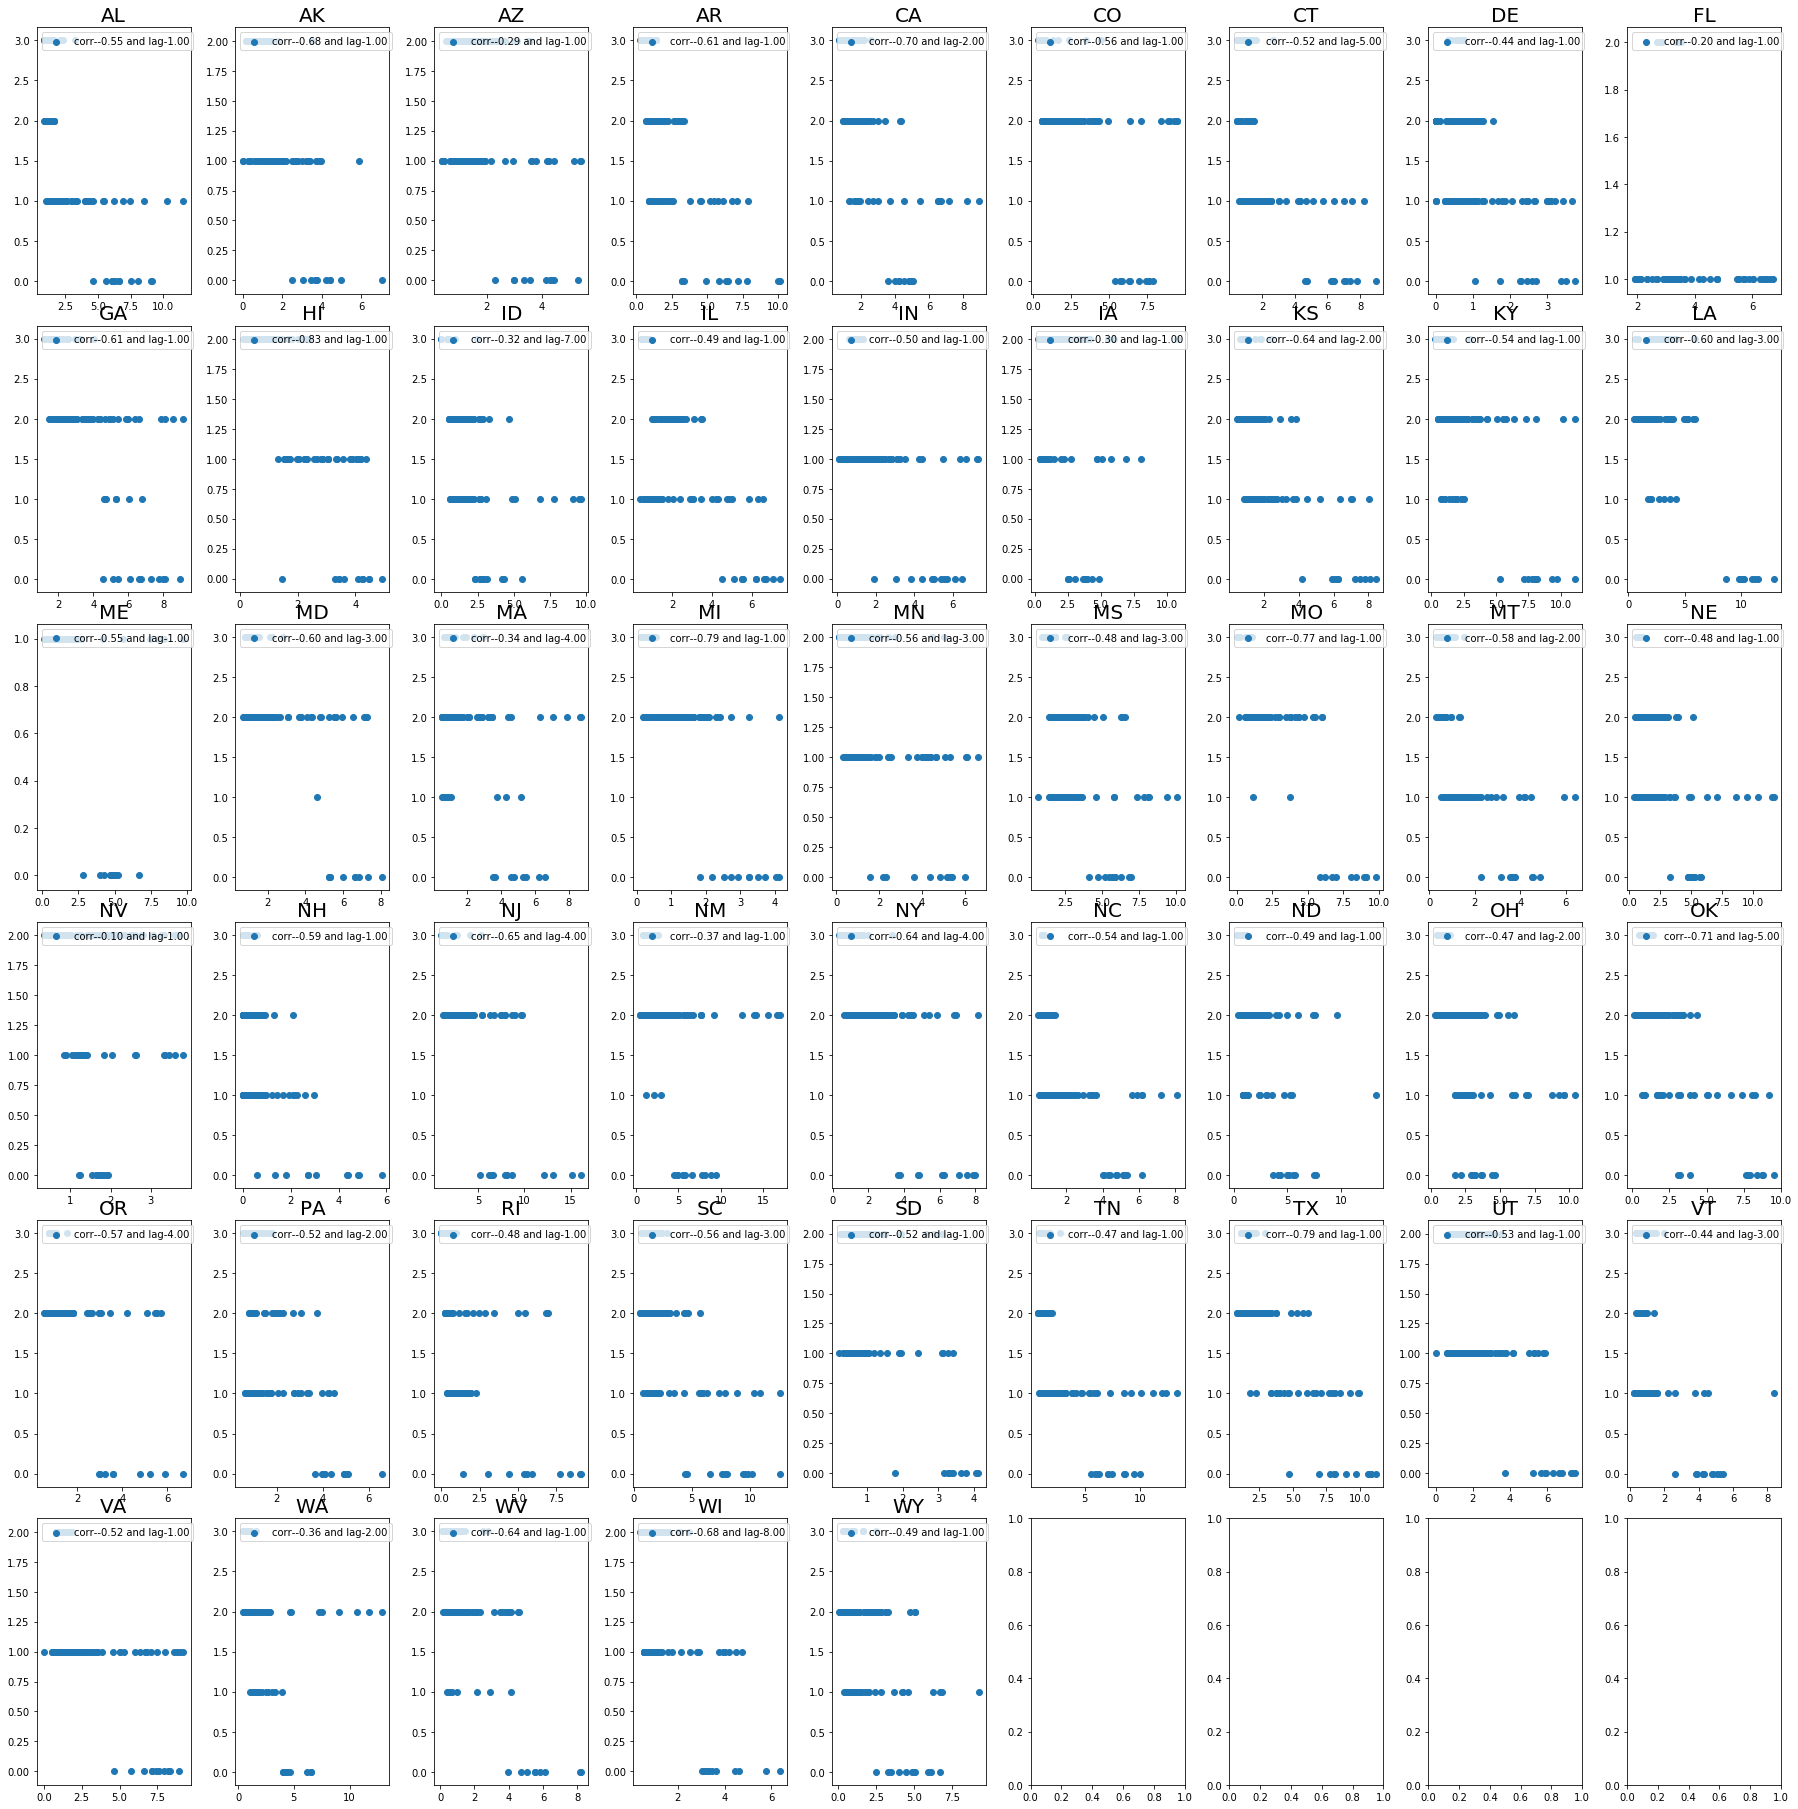

In [60]:
lag_dict=correlation_lags_all_states('elderly_mode','2020-01-05','2022-12-25',10,'cat')


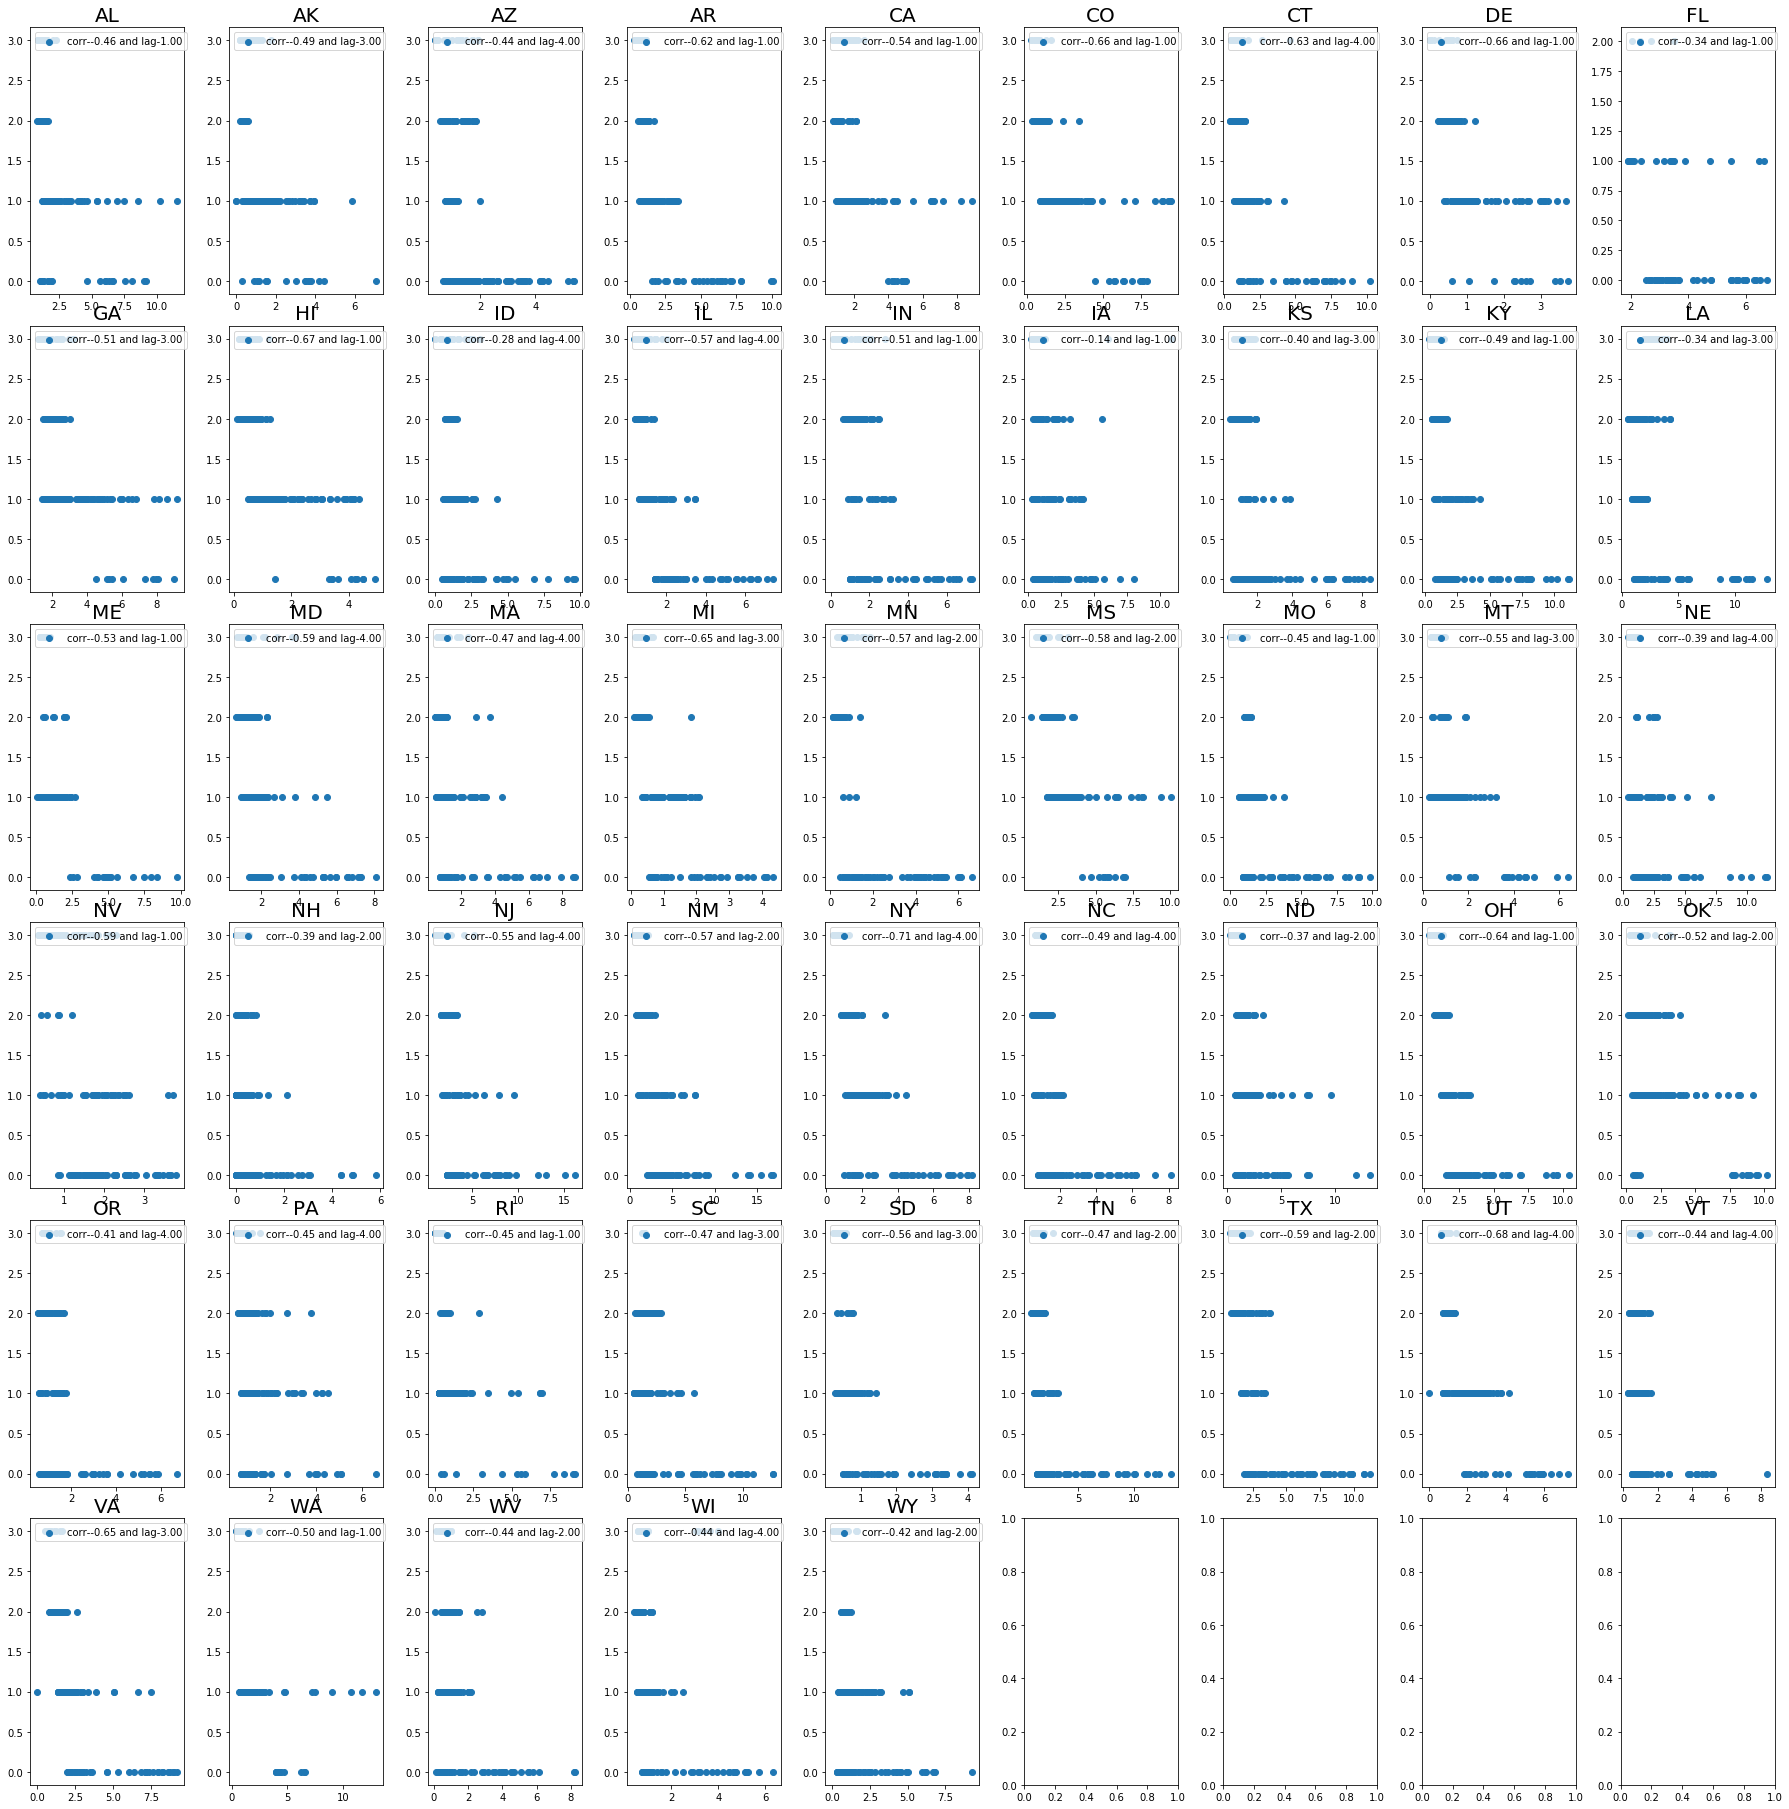

In [61]:
lag_dict=correlation_lags_all_states('school_mode','2020-01-05','2022-12-25',5,'cat')


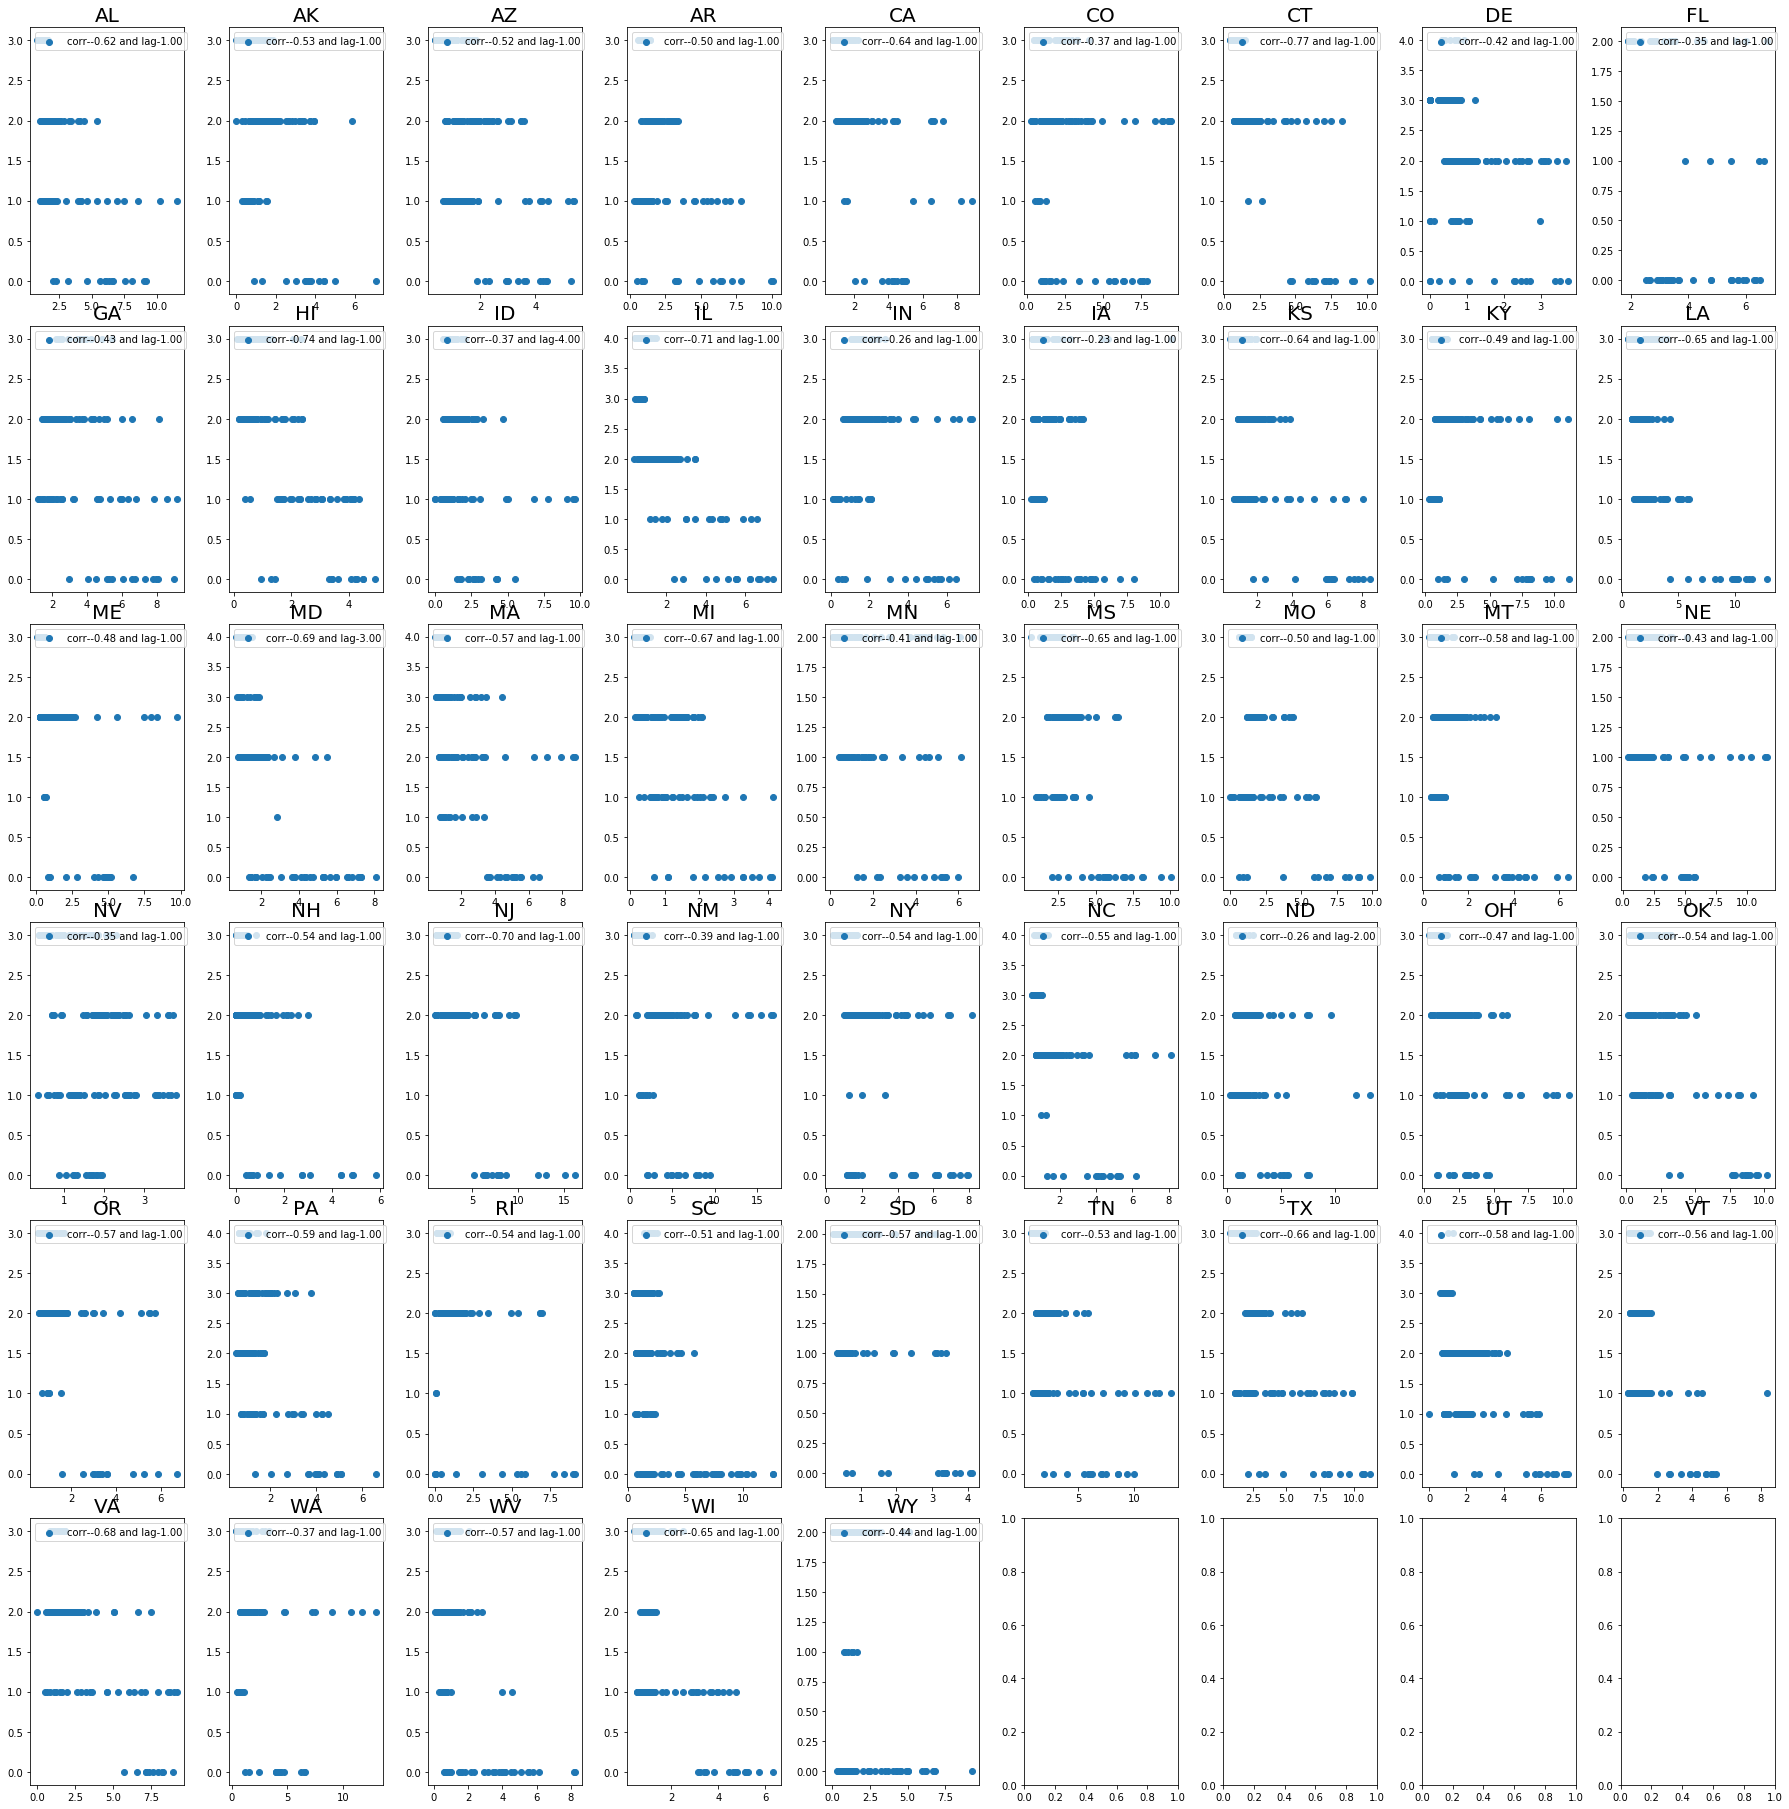

In [62]:
lag_dict=correlation_lags_all_states('masking_mode','2020-01-05','2022-12-25',5,'cat')
